
<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
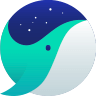
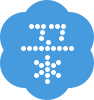

In [1]:
import requests

response = requests.get("https://www.naver.com")
html = response.text
print(html)

In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

word = soup.select_one('#NM_set_home_btn')
print(word)
print("===============")
print(word.string)

<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>
네이버를 시작페이지로


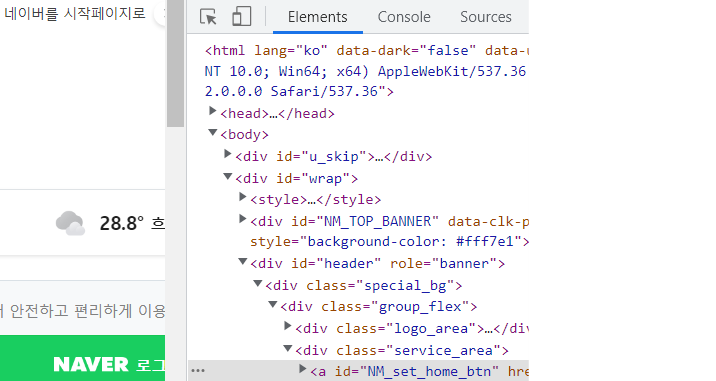

---

## 네이버에 "토스뱅크" 검색 후 기사 크롤링하기

In [5]:
response = requests.get("https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query=%ED%86%A0%EC%8A%A4%EB%B1%85%ED%81%AC&oquery=toss&tqi=hrskOdprvN8ssDFeoqNssssstON-484861")
html = response.text

soup = BeautifulSoup(html, 'html.parser')
links = soup.select(".news_tit")
print(links)

[<a class="news_tit" href="http://www.newsis.com/view/?id=NISX20220617_0001910983&amp;cID=15001&amp;pID=15000" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=88000127_000000000000000011252752&amp;g=003.0011252752&amp;u='+urlencode(this.href));" target="_blank" title="토스뱅크, '키워봐요 적금' 출시 3일 만에 10만좌 돌파"><mark>토스뱅크</mark>, '키워봐요 적금' 출시 3일 만에 10만좌 돌파</a>, <a class="news_tit" href="http://news.heraldcorp.com/view.php?ud=20220620000254" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=6&amp;i=8800010E_000000000000000002004922&amp;g=016.0002004922&amp;u='+urlencode(this.href));" target="_blank" title="토스뱅크, ‘카드론→신용대출’ 대환에 카드사 반발"><mark>토스뱅크</mark>, ‘카드론→신용대출’ 대환에 카드사 반발</a>, <a class="news_tit" href="https://www.yna.co.kr/view/AKR20220614065400002?input=1195m" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=8&amp;i=880000D8_000000000000000013244326&amp;g=001.0013244326&amp;u='+urlencode(this.href));" target="_blank" title="&quot;동물 키우며 적금해요&quot;…토스뱅크, '연 3% 키워봐요 적금' 출시">"동물 키

In [6]:
# .news_tit 에 해당하는 텍스트와 링크 가져오기
for link in links:
    # .text를 통해 텍스트를 가져온다.
    title = link.text
    
    # .attrs['href'] 를 통해 속성 'href' 의 값을 가져온다.
    url = link.attrs['href']
    print(title, url)

토스뱅크, '키워봐요 적금' 출시 3일 만에 10만좌 돌파 http://www.newsis.com/view/?id=NISX20220617_0001910983&cID=15001&pID=15000
토스뱅크, ‘카드론→신용대출’ 대환에 카드사 반발 http://news.heraldcorp.com/view.php?ud=20220620000254
"동물 키우며 적금해요"…토스뱅크, '연 3% 키워봐요 적금' 출시 https://www.yna.co.kr/view/AKR20220614065400002?input=1195m
토스뱅크, '키워봐요 적금' 출시 3일 만에 10만좌 돌파 http://www.segye.com/content/html/2022/06/17/20220617509670.html?OutUrl=naver
토스뱅크, 출범 후 첫 정기적금 출시 https://zdnet.co.kr/view/?no=20220614113559
이승건·홍민택·박재민 토스, MZ 기반 금융 판 뒤흔든다 http://www.fntimes.com/html/view.php?ud=202206172049011244dd55077bc2_18
[Daily Pick 금융] 토스뱅크, 롯데카드, 케이뱅크, NH투자증권, 신한카드 外 https://www.ngetnews.com/news/articleView.html?idxno=408613
高금리의 역설…토스뱅크, 금리인상에 '숨 고르기' http://www.econovill.com/news/articleView.html?idxno=578954
토스, 개발자 컨퍼런스 '슬래시 22' 성료…약 9000명 참가 https://economist.co.kr/2022/06/15/finance/bank/20220615110610608.html
[뱅크룸] BNK부산은행 '제34회 한국노사협력대상' 수상 외 http://www.newsprime.co.kr/news/article.html?no=570902


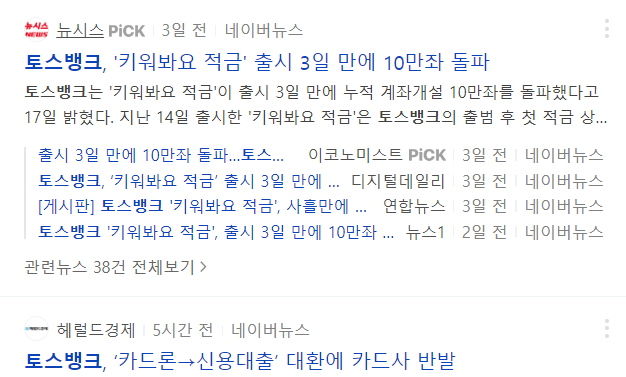

---

### 키워드를 입력 받아 기사 크롤링하기

>   네이버 뉴스 페이지는 ("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=")는 고정으로 입력되며 query= 옆에 오는 문자에 따라 검색을 달리 하기에 뒤에 부분만 바꾸어준다.

In [7]:
keyword = input("검색어 입력 : ")

response = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=" + keyword)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
links = soup.select(".news_tit")

for link in links:
    title = link.text
    url = link.attrs['href'] # href의 속성값을 가져옴
    print(title, url)

검색어 입력 : 토스뱅크
토스뱅크, '키워봐요 적금' 출시 3일 만에 10만좌 돌파 http://www.newsis.com/view/?id=NISX20220617_0001910983&cID=15001&pID=15000
토스뱅크, ‘카드론→신용대출’ 대환에 카드사 반발 http://news.heraldcorp.com/view.php?ud=20220620000254
"동물 키우며 적금해요"…토스뱅크, '연 3% 키워봐요 적금' 출시 https://www.yna.co.kr/view/AKR20220614065400002?input=1195m
토스뱅크, 출범 후 첫 정기적금 출시 https://zdnet.co.kr/view/?no=20220614113559
토스뱅크, '키워봐요 적금' 출시 3일 만에 10만좌 돌파 http://www.segye.com/content/html/2022/06/17/20220617509670.html?OutUrl=naver
이승건·홍민택·박재민 토스, MZ 기반 금융 판 뒤흔든다 http://www.fntimes.com/html/view.php?ud=202206172049011244dd55077bc2_18
[Daily Pick 금융] 토스뱅크, 롯데카드, 케이뱅크, NH투자증권, 신한카드 外 https://www.ngetnews.com/news/articleView.html?idxno=408613
高금리의 역설…토스뱅크, 금리인상에 '숨 고르기' http://www.econovill.com/news/articleView.html?idxno=578954
토스, 개발자 컨퍼런스 '슬래시 22' 성료…약 9000명 참가 https://economist.co.kr/2022/06/15/finance/bank/20220615110610608.html
[뱅크룸] BNK부산은행 '제34회 한국노사협력대상' 수상 외 http://www.newsprime.co.kr/news/article.html?no=570902


In [8]:
import pyautogui
keyword = pyautogui.prompt("검색어 입력.")

response = requests.get(f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}")
html = response.text
soup = BeautifulSoup(html, 'html.parser')
links = soup.select(".news_tit")

for link in links:
    title = link.text
    url = link.attrs['href'] # href의 속성값을 가져옴
    print(title, url)

카카오뱅크, 예·적금 금리 최대 0.40%p 인상 http://www.newsis.com/view/?id=NISX20220620_0001913573&cID=15001&pID=15000
카카오뱅크, 예적금 금리 0.4%p 인상 http://www.fnnews.com/news/202206201554064288
[A 금융가 소식] 카카오뱅크, 예·적금 금리 최대 0.40%p 인상 外 http://www.asiaa.co.kr/news/articleView.html?idxno=90055
은행주, 카카오뱅크 편입 후 첫 시총 100조 아래로 '추락' http://www.whitepaper.co.kr/news/articleView.html?idxno=217256
카카오뱅크, 14일부터 신용대출 제한적 재개… 최대한도 1억원 https://biz.chosun.com/stock/finance/2022/06/13/4V7YNXKNIJHGBG5AE4YAEDRHOE/?utm_source=naver&utm_medium=original&utm_campaign=biz
카카오뱅크, 신용대출 제한적 재개 http://www.munhwa.com/news/view.html?no=2022061401039905006001
카카오뱅크, 중·저신용자 비중 올랐다…고신용자 신용대출 재개 https://isplus.joins.com/2022/06/15/life/economy/20220615070033453.html
[특징주] 글로벌 긴축 우려에 네이버·카카오 나란히 52주 신저가(종합) https://www.yna.co.kr/view/AKR20220613041051002?input=1195m
카카오뱅크, 콘텐츠 모음 메뉴 '이야기' 오픈 https://view.asiae.co.kr/article/2022060909463703875
울고싶은데 뺨맞은 카카오3형제, 시총 4.2조원 증발 http://www.edaily.co.kr/news/newspath.asp?newsid=03302966632361392


In [9]:
keyword = pyautogui.prompt("검색어 입력:")

# 입력받으면 문자열로 자동 저장됨 ( 그래서 숫자형은 자료형 변환 필요 )
lastPage = pyautogui.prompt("마지막 페이지번호를 입력해주세요")
pageNum = 1
for i in range(1, int(lastPage) * 10, 10):
    print(f"{pageNum}페이지 넘버 입니다.----------------------------------------------------------")
    response = requests.get(f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start={i}")
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.select(".news_tit") # 결과는 list
    
    for link in links:
        title = link.text
        url = link.attrs['href']
        print(title, url)
    pageNum += 1

1페이지 넘버 입니다.----------------------------------------------------------
토스뱅크, '키워봐요 적금' 출시 3일 만에 10만좌 돌파 http://www.newsis.com/view/?id=NISX20220617_0001910983&cID=15001&pID=15000
토스뱅크, ‘카드론→신용대출’ 대환에 카드사 반발 http://news.heraldcorp.com/view.php?ud=20220620000254
"동물 키우며 적금해요"…토스뱅크, '연 3% 키워봐요 적금' 출시 https://www.yna.co.kr/view/AKR20220614065400002?input=1195m
토스뱅크, 출범 후 첫 정기적금 출시 https://zdnet.co.kr/view/?no=20220614113559
토스뱅크, '키워봐요 적금' 출시 3일 만에 10만좌 돌파 http://www.segye.com/content/html/2022/06/17/20220617509670.html?OutUrl=naver
이승건·홍민택·박재민 토스, MZ 기반 금융 판 뒤흔든다 http://www.fntimes.com/html/view.php?ud=202206172049011244dd55077bc2_18
[Daily Pick 금융] 토스뱅크, 롯데카드, 케이뱅크, NH투자증권, 신한카드 外 https://www.ngetnews.com/news/articleView.html?idxno=408613
高금리의 역설…토스뱅크, 금리인상에 '숨 고르기' http://www.econovill.com/news/articleView.html?idxno=578954
토스, 개발자 컨퍼런스 '슬래시 22' 성료…약 9000명 참가 https://economist.co.kr/2022/06/15/finance/bank/20220615110610608.html
[뱅크룸] BNK부산은행 '제34회 한국노사협력대상' 수상 외 http://www.newsprime.c

*   페이지가 이동할 때마다 "https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start={i}" 웹 주소에서 start= 부분이 (1, 11, 21, 31 ...) 로 바뀌는 규칙이 있다.